<h2>Fashion MNIST dataset in Keras library</h2>

## Imports

In [2]:
# - TensorFlow
import tensorflow as tf
# - Dataset
from tensorflow.keras.datasets import fashion_mnist
# - Helper libraries
import numpy as np
import pandas as pd
import time
from sklearn.metrics import confusion_matrix
from tensorflow.keras.utils import to_categorical
# - Graph plots
%matplotlib inline
from matplotlib import pyplot as plt
# - Keras models and layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Convolution2D, MaxPooling2D

# Print some stuff
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.0.0


<h2>Load data</h2>

In [3]:
# Load pre-shuffled Fashion MNIST data into train and test sets
(X_train, y_train_raw), (X_test, y_test_raw) = fashion_mnist.load_data()

# Convert to float values and normalize between 0...1
X_train = X_train.astype("float32")
X_test = X_test.astype("float32")
X_train /= 255 
X_test /= 255

# Preprocess class labels
# Convert labels to 10-dimensional one-hot vectors
y_train = to_categorical(y_train_raw, 10)
y_test = to_categorical(y_test_raw, 10)

print("Training instances: {}".format(X_train.shape[0]))
print("Test instances: {}".format(X_test.shape[0]))
print()
print("Structure of training set: {}".format(X_train.shape))
print("Structure of labels set: {}".format(y_train.shape))

Training instances: 60000
Test instances: 10000

Structure of training set: (60000, 28, 28)
Structure of labels set: (60000, 10)


<h2>Pre-process data for 1D or 2D inputs</h2>

In [4]:
# Preprocess for 1D input data
X_train_1D = X_train.reshape(X_train.shape[0], 784)
X_test_1D = X_test.reshape(X_test.shape[0], 784)
print("1D shape:", X_train_1D.shape)

# Preprocess for 2D input data
X_train_2D = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test_2D = X_test.reshape(X_test.shape[0], 28, 28, 1)
print("2D shape:", X_train_2D.shape)

1D shape: (60000, 784)
2D shape: (60000, 28, 28, 1)


## Linear model

Train on 54000 samples, validate on 6000 samples
Epoch 1/6
54000/54000 [==============================] - 2s 44us/sample - loss: 0.6794 - accuracy: 0.7709 - val_loss: 0.5208 - val_accuracy: 0.8250
Epoch 2/6
54000/54000 [==============================] - 2s 30us/sample - loss: 0.4915 - accuracy: 0.8344 - val_loss: 0.4656 - val_accuracy: 0.8377
Epoch 3/6
54000/54000 [==============================] - 2s 30us/sample - loss: 0.4560 - accuracy: 0.8456 - val_loss: 0.4497 - val_accuracy: 0.8475
Epoch 4/6
54000/54000 [==============================] - 2s 31us/sample - loss: 0.4384 - accuracy: 0.8508 - val_loss: 0.4472 - val_accuracy: 0.8462
Epoch 5/6
54000/54000 [==============================] - 2s 32us/sample - loss: 0.4269 - accuracy: 0.8543 - val_loss: 0.4314 - val_accuracy: 0.8507
Epoch 6/6
54000/54000 [==============================] - 2s 32us/sample - loss: 0.4194 - accuracy: 0.8558 - val_loss: 0.4188 - val_accuracy: 0.8523

Test Accuracy: 84.16%
Time elapsed: 11.11 sec


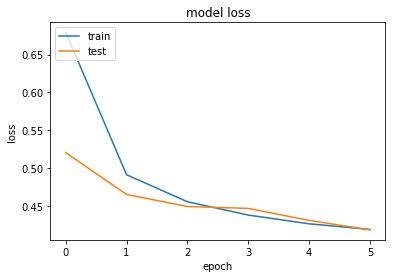

In [5]:
# Create Linear Softmax model
lin_clf = Sequential()
lin_clf.add(Dense(10, input_dim=784, activation="softmax"))

# Compile model
lin_clf.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

# Start timer
start = time.time()

# Train model on training data
history = lin_clf.fit(X_train_1D, y_train, batch_size=64, epochs=6, validation_split=0.1, verbose=1)
# Evaluate model on test data
score = lin_clf.evaluate(X_test_1D, y_test, verbose=0)

# Stop timer
end = time.time()

# Print results
print("\nTest Accuracy: {0:0.2f}%".format(score[1] * 100))
print("Time elapsed: {0:0.2f} sec".format(end - start))

# Plot training history
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## NN model

Train on 54000 samples, validate on 6000 samples
Epoch 1/8
54000/54000 [==============================] - 4s 72us/sample - loss: 0.5773 - accuracy: 0.7939 - val_loss: 0.3962 - val_accuracy: 0.8540
Epoch 2/8
54000/54000 [==============================] - 3s 60us/sample - loss: 0.4137 - accuracy: 0.8501 - val_loss: 0.3922 - val_accuracy: 0.8543
Epoch 3/8
54000/54000 [==============================] - 3s 60us/sample - loss: 0.3760 - accuracy: 0.8611 - val_loss: 0.3415 - val_accuracy: 0.8717
Epoch 4/8
54000/54000 [==============================] - 3s 59us/sample - loss: 0.3553 - accuracy: 0.8696 - val_loss: 0.3410 - val_accuracy: 0.8748
Epoch 5/8
54000/54000 [==============================] - 3s 57us/sample - loss: 0.3381 - accuracy: 0.8764 - val_loss: 0.3389 - val_accuracy: 0.8755
Epoch 6/8
54000/54000 [==============================] - 3s 57us/sample - loss: 0.3236 - accuracy: 0.8807 - val_loss: 0.3247 - val_accuracy: 0.8837
Epoch 7/8
54000/54000 [==============================] - 3s 58u

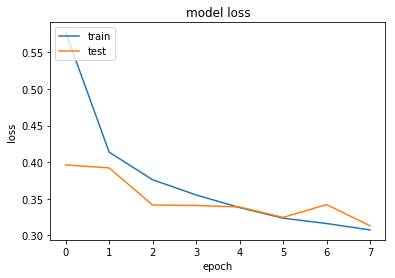

In [6]:
# Create Neural Net Softmax model
nn_clf = Sequential()
# - first Dense
nn_clf.add(Dense(128, input_dim=784, activation="relu", kernel_initializer="normal"))
nn_clf.add(Dropout(0.2))
# - second Dense
nn_clf.add(Dense(128, activation="relu", kernel_initializer="normal"))
nn_clf.add(Dropout(0.2))
# - output
nn_clf.add(Dense(10, activation="softmax"))

# Compile model
nn_clf.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

# Start timer
start = time.time()

# Train model on training data
history = nn_clf.fit(X_train_1D, y_train, batch_size=64, epochs=8, validation_split=0.1, verbose=1)
# Evaluate model on test data
score = nn_clf.evaluate(X_test_1D, y_test, verbose=0)

# Stop timer
end = time.time()

# Print results
print("\nTest Accuracy: {0:0.2f}%".format(score[1] * 100))
print("Time elapsed: {0:0.2f} sec".format(end - start))

# Plot training history
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## ConvNet model

Train on 54000 samples, validate on 6000 samples
Epoch 1/8
54000/54000 [==============================] - 63s 1ms/sample - loss: 0.5747 - accuracy: 0.7914 - val_loss: 0.3640 - val_accuracy: 0.8660
Epoch 2/8
54000/54000 [==============================] - 62s 1ms/sample - loss: 0.3814 - accuracy: 0.8621 - val_loss: 0.3317 - val_accuracy: 0.8763
Epoch 3/8
54000/54000 [==============================] - 62s 1ms/sample - loss: 0.3356 - accuracy: 0.8781 - val_loss: 0.2863 - val_accuracy: 0.8937
Epoch 4/8
54000/54000 [==============================] - 61s 1ms/sample - loss: 0.3060 - accuracy: 0.8880 - val_loss: 0.2741 - val_accuracy: 0.8957
Epoch 5/8
54000/54000 [==============================] - 62s 1ms/sample - loss: 0.2869 - accuracy: 0.8962 - val_loss: 0.2546 - val_accuracy: 0.9055
Epoch 6/8
54000/54000 [==============================] - 67s 1ms/sample - loss: 0.2694 - accuracy: 0.9015 - val_loss: 0.2465 - val_accuracy: 0.9097
Epoch 7/8
54000/54000 [==============================] - 61s 1m

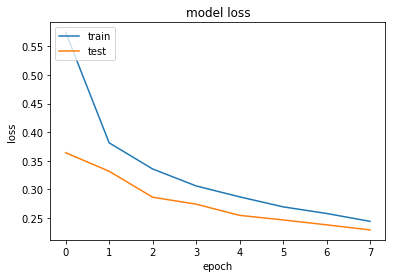

In [8]:
# Create ConvNet model
cnn_clf = Sequential()
# - first conv/pool 
cnn_clf.add(Convolution2D(32, (3,3), input_shape=(28,28,1), activation="relu", padding="same", kernel_initializer="normal"))
cnn_clf.add(MaxPooling2D(pool_size=(2,2))) # reduces size to 14x14
cnn_clf.add(Dropout(0.3))
# - second conv/pool
cnn_clf.add(Convolution2D(64, (3,3), activation="relu", padding="same", kernel_initializer="normal"))
cnn_clf.add(MaxPooling2D(pool_size=(2,2))) # reduces size to 7x7
cnn_clf.add(Dropout(0.3))
# - fully connected
cnn_clf.add(Flatten())
cnn_clf.add(Dense(128, activation="relu"))
cnn_clf.add(Dropout(0.3))
# - output
cnn_clf.add(Dense(10, activation="softmax"))

# Compile model
cnn_clf.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

# Start timer
start = time.time()

# Train model on training data
history = cnn_clf.fit(X_train_2D, y_train, batch_size=64, epochs=8, validation_split=0.1, verbose=1)
# Evaluate model on test data
score = cnn_clf.evaluate(X_test_2D, y_test, verbose=0)

# Stop timer
end = time.time()

# Print results
print("\nTest Accuracy: {0:0.2f}%".format(score[1] * 100))
print("Time elapsed: {0:0.2f} sec".format(end - start))

# Plot training history
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

<h2>Confusion matrix</h2>

In [9]:
# Make predictions
y_pred = cnn_clf.predict(X_test_2D)

# Confusion matrix
conf_mx = confusion_matrix(
    np.argmax(y_test,axis=1), 
    np.argmax(y_pred, axis=1))
print(conf_mx)

[[903   0  12  16   7   2  56   0   4   0]
 [  1 977   0  17   1   0   3   0   1   0]
 [ 19   1 867   4  62   0  47   0   0   0]
 [ 16   1  10 913  31   0  29   0   0   0]
 [  1   0  48  22 889   0  40   0   0   0]
 [  0   0   0   0   0 973   0  21   0   6]
 [142   1  64  25  83   0 681   0   4   0]
 [  0   0   0   0   0   2   0 972   0  26]
 [  2   1   4   3   4   2   2   4 978   0]
 [  0   0   0   0   0   3   1  31   0 965]]


<h2>Predict examples</h2>

Predicted: Ankle boot
Actual: Ankle boot


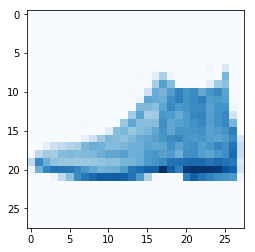

Predicted: Pullover
Actual: Pullover


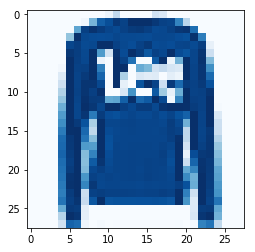

Predicted: Trouser
Actual: Trouser


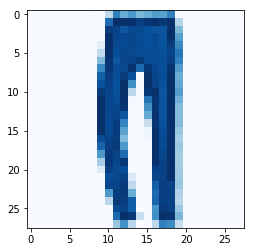

In [10]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
                   "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

# Examples to classify
examples = X_test_2D[:3]

res = np.argmax(cnn_clf.predict(examples), axis=1)

for i in range(0,len(res)):
    print("Predicted:",class_names[res[i]])
    print("Actual:",class_names[y_test_raw[i]])
    plt.imshow(X_test[i], cmap=plt.cm.Blues)
    plt.show()